In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir("../input"))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

['inputs', 'housingpricedataset']


In [2]:
missing_values = ["n/a", "na", "--"]
# df = pd.read_csv('../input/housingpricedataset/Housing Price data set.csv')
exam_df = pd.read_csv('../input/inputs/exam.csv', header = None, na_values = missing_values)
mc_df = pd.read_csv('../input/inputs/microchip.csv', header = None, na_values = missing_values)

In [3]:
exam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
0    100 non-null float64
1    100 non-null float64
2    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [4]:
exam_df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
x_features = [0,1]
y_features = [2]
x_exam = exam_df[x_features]
y_exam = exam_df[y_features]

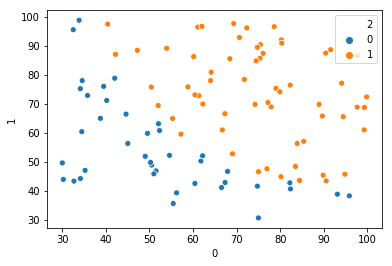

In [6]:
# sns.catplot(x="x1", y="x2", data=);
sns.scatterplot(x=0,y=1,hue=2,data=exam_df)
# plt.plot([0, 4], [1.5, 0], linewidth=2)

In [7]:
X_train, X_test, Y_train, Y_test = tts(x_exam, y_exam, test_size = 0.3, shuffle = True)

In [8]:
X_test = (X_test - np.mean(X_train))/np.std(X_train)
X_train = (X_train - np.mean(X_train))/np.std(X_train)

In [9]:
X_train = X_train.assign(b=1)
X_test = X_test.assign(b=1)

X_train = X_train.values
Y_train = Y_train.values
# print(X_train)
# print(Y_train)

In [10]:
m, n = X_train.shape
weights = np.random.rand(X_train.shape[1], 1)
weights

array([[0.8375108 ],
       [0.29488568],
       [0.25617161]])

# Utils

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def GD_predict(X, weights):
    p = np.dot(X, weights)
    if(sigmoid(p) >= 0.5):
        return 1
    else:
        return 0
    
def predict(features, weights):
  z = np.dot(features, weights)
  return sigmoid(z)


def gradient(X, Y, weights):
  m = X.shape[0]
  Y_pred = predict(X, weights)
  return np.dot(X.T, Y-Y_pred)


def hessian(X, Y, weights):
  M, N = X.shape
  H = np.zeros((N, N))
  for j in range(N):
    for k in range(N):
      H[j, k] = sum(X[i,j] * 
                    X[i,k] * 
                    predict(X[i:i+1], weights) * 
                    (1-predict(X[i:i+1], weights)) 
                    for i in range(M))
  return H


In [12]:
def update_weights(features, labels, weights):
  grad = gradient(features, labels, weights)
  H = hessian(features, labels, weights)
  H_inv = np.linalg.pinv(H)
  weights += np.dot(H_inv, grad)
  return weights

def cost_fn(features, labels, weights):
  m = len(labels)
  predictions = predict(features, weights)
  cost = -labels*np.log(predictions) - (1-labels)*np.log(1-predictions)
  return cost.sum() / m

def newtons_method(features, labels, weights, epochs):
  cost_history = []
#   print(features[:3], labels[:3])
  for i in range(epochs+1):
    weights = update_weights(features, labels, weights)
    cost = cost_fn(features, labels, weights)
    cost_history.append(cost)
    
      
  return weights,cost_history

****Exam Result Dataset****

In [13]:
epochs = 10
weights,cost_history = newtons_method(X_train, Y_train, weights, epochs)
print(weights)


[[3.49763898]
 [3.39298902]
 [0.82946096]]


Confusion Matrix [[ 7  1]
 [ 1 21]]


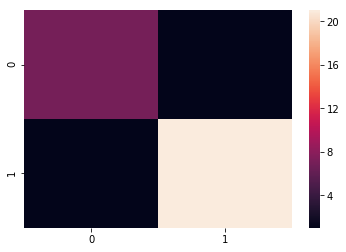

In [14]:
Y_predicted = [GD_predict(x, weights) for x in X_test.values]
cm = confusion_matrix(Y_test, Y_predicted)
print("Confusion Matrix",cm)
ax = sns.heatmap(confusion_matrix(Y_test, Y_predicted))

0.9333333333333333


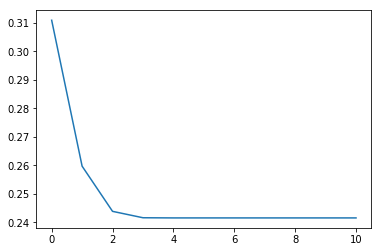

In [15]:
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
recall = (cm[1][1])/(cm[1][1] + cm[0][1])
precision = (cm[1][1])/(cm[1][1] + cm[0][0])
print(accuracy)
plt.plot(cost_history)

****Microchip Dataset****

In [16]:
x_features = [0,1]
y_features = [2]
x_exam = np.square(mc_df[x_features])
y_exam = mc_df[y_features]

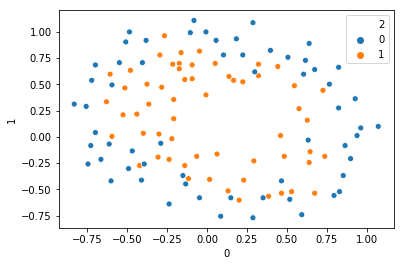

In [17]:
sns.scatterplot(x=0,y=1,hue=2,data=mc_df)

In [18]:
X_train, X_test, Y_train, Y_test = tts(x_exam, y_exam, test_size = 0.3, shuffle = True)

In [19]:
X_test = (X_test - np.mean(X_train))/np.std(X_train)
X_train = (X_train - np.mean(X_train))/np.std(X_train)
X_train = X_train.assign(b=1)
X_test = X_test.assign(b=1)
X_train = X_train.values
Y_train = Y_train.values

In [20]:
m, n = X_train.shape
weights = np.random.rand(X_train.shape[1], 1)
weights

array([[0.8735906 ],
       [0.72735775],
       [0.36856574]])

In [21]:
epochs = 5
weights,cost_history = newtons_method(X_train, Y_train, weights, epochs)
print(weights)

[[-1.51805876]
 [-1.11322998]
 [ 0.04252021]]


Confusion Matrix [[17  4]
 [ 4 11]]


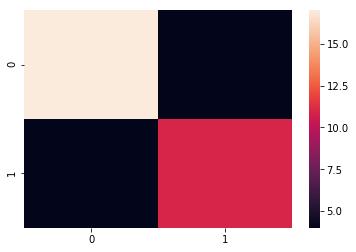

In [22]:
Y_predicted = [GD_predict(x, weights) for x in X_test.values]
cm = confusion_matrix(Y_test, Y_predicted)
print("Confusion Matrix",cm)
ax = sns.heatmap(confusion_matrix(Y_test, Y_predicted))

0.7777777777777778


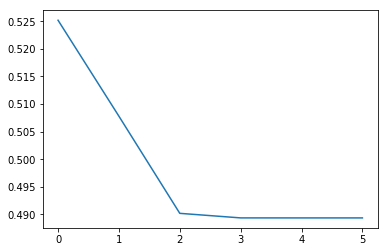

In [23]:
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
recall = (cm[1][1])/(cm[1][1] + cm[0][1])
precision = (cm[1][1])/(cm[1][1] + cm[0][0])
print(accuracy)
plt.plot(cost_history)